# **Data Preparation**

In [19]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

In [20]:
features = pd.read_csv('Downloads/Retail/Features data set.csv')
stores = pd.read_csv('Downloads/Retail/stores data-set.csv')
sales = pd.read_csv('Downloads/Retail/sales data-set.csv')
for table, name in zip([features, stores, sales],['features','stores','sales']):
    print(f'Table {name} has {table.shape[0]} row and {table.shape[1]} col')

Table features has 8190 row and 12 col
Table stores has 45 row and 3 col
Table sales has 421570 row and 5 col


In [21]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [22]:
stores.describe(percentiles=[.25, .5, .75, .9, .95, .995], include='all')

Store Type      Size
count   45.00   45     45.00
unique    NaN    3       NaN
top       NaN    A       NaN
freq      NaN   22       NaN
mean    23.00  NaN 130287.60
std     13.13  NaN  63825.27
min      1.00  NaN  34875.00
25%     12.00  NaN  70713.00
50%     23.00  NaN 126512.00
75%     34.00  NaN 202307.00
90%     40.60  NaN 204038.00
95%     42.80  NaN 206214.20
99.5%   44.78  NaN 216954.94
max     45.00  NaN 219622.00

In [23]:
sales.describe(percentiles=[.25, .5, .75, .9, .95, .995], include='all')

Store      Dept        Date  Weekly_Sales IsHoliday
count  421570.00 421570.00      421570     421570.00    421570
unique       NaN       NaN         143           NaN         2
top          NaN       NaN  23/12/2011           NaN     False
freq         NaN       NaN        3027           NaN    391909
mean       22.20     44.26         NaN      15981.26       NaN
std        12.79     30.49         NaN      22711.18       NaN
min         1.00      1.00         NaN      -4988.94       NaN
25%        11.00     18.00         NaN       2079.65       NaN
50%        22.00     37.00         NaN       7612.03       NaN
75%        33.00     74.00         NaN      20205.85       NaN
90%        40.00     92.00         NaN      42845.67       NaN
95%        43.00     95.00         NaN      61201.95       NaN
99.5%      45.00     98.00         NaN     130447.87       NaN
max        45.00     99.00         NaN     693099.36       NaN

In [24]:
print("In table Sales, num of negative of week_sales is {n} ({p})".format(n = len(sales.query('Weekly_Sales<= 0')), p = len(sales[sales['Weekly_Sales'] <= 0])/sales.shape[0]))

In table Sales, num of negative of week_sales is 1358 (0.003221291837654482)


For these negative values, we will replace it with value 0

In [25]:
sales['Weekly_Sales'] = np.where(sales['Weekly_Sales'] < 0, 0, sales['Weekly_Sales'])

In [26]:
def outlier(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  print(f'{col} has bound ({lower_bound};{upper_bound})')

In [27]:
outlier(sales, 'Weekly_Sales')

Weekly_Sales has bound (-25109.653749999998;47395.15625)


Although upper bound is at 47.4k, sales in retail chain has a little of outliers due to some occasional events in year, thus all values will be remained and explore further later

In [28]:
features.describe(percentiles=[.25, .5, .75, .9, .95, .995], include='all').T

count unique         top  freq    mean      std      min  \
Store        8190.00    NaN         NaN   NaN   23.00    12.99     1.00   
Date            8190    182  05/02/2010    45     NaN      NaN      NaN   
Temperature  8190.00    NaN         NaN   NaN   59.36    18.68    -7.29   
Fuel_Price   8190.00    NaN         NaN   NaN    3.41     0.43     2.47   
MarkDown1    4032.00    NaN         NaN   NaN 7032.37  9262.75 -2781.45   
MarkDown2    2921.00    NaN         NaN   NaN 3384.18  8793.58  -265.76   
MarkDown3    3613.00    NaN         NaN   NaN 1760.10 11276.46  -179.26   
MarkDown4    3464.00    NaN         NaN   NaN 3292.94  6792.33     0.22   
MarkDown5    4050.00    NaN         NaN   NaN 4132.22 13086.69  -185.17   
CPI          7605.00    NaN         NaN   NaN  172.46    39.74   126.06   
Unemployment 7605.00    NaN         NaN   NaN    7.83     1.88     3.68   
IsHoliday       8190      2       False  7605     NaN      NaN      NaN   

                 25%     50%     75%      90%      95%    99.5%       max  
Store          12.00   23.00   34.00    41.00    43.00    45.00     45.00  
Date             NaN     NaN     NaN      NaN      NaN      NaN       NaN  
Temperature    45.90   60.71   73.88    83.36    87.13    95.36    101.95  
Fuel_Price      3.04    3.51    3.74     3.90     4.02     4.28      4.47  
MarkDown1    1577.53 4743.58 8923.31 14767.59 21500.93 65628.44 103184.98  
MarkDown2      68.88  364.57 2153.35  8546.67 17261.44 53545.44 104519.54  
MarkDown3       6.60   36.26  163.15   530.47  1159.76 89366.82 149483.31  
MarkDown4     304.69 1176.42 3310.01  7570.29 12863.77 48136.80  67474.85  
MarkDown5    1440.83 2727.14 4832.56  7625.70 10227.86 31378.82 771448.10  
CPI           132.36  182.76  213.93   221.46   223.87   228.04    228.98  
Unemployment    6.63    7.81    8.57     9.82    10.93    14.31     14.31  
IsHoliday        NaN     NaN     NaN      NaN      NaN      NaN       NaN

Markdown seem to miss many values. However since Nov 2011, it was already run, so we will summary statistics of missing values later.

In [29]:
MarkDown = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
for i in MarkDown:
    outlier(features, i)

MarkDown1 has bound (-9441.13375;19941.97625)
MarkDown2 has bound (-3057.825;5280.055)
MarkDown3 has bound (-228.22500000000002;397.975)
MarkDown4 has bound (-4203.2925000000005;7817.987500000001)
MarkDown5 has bound (-3646.7637500000005;9920.146250000002)


Although Markdowns in Features table are out of upper bound, they should be remained to reflect the state of promotional activies and serve the analysis later

In [30]:
summary = pd.merge(sales, features.loc[:, features. columns != 'IsHoliday'],how = 'left', on = ['Store','Date'])

In [31]:
summary = pd.merge(summary, stores, how = 'left', on = ['Store'])
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


New table **summary** is created by merging from 3 above tables to serve EDA phase later.  
It reflects weekly sales by departments under many aspects

In [32]:
summary['Date'] = pd.to_datetime(summary['Date'], format='%d/%m/%Y')
summary['WeekOfYear'] = summary.Date.dt.week
summary['Year'] = summary.Date.dt.year

In [33]:
summary['Store'] = summary['Store'].astype('object')
summary['Dept'] = summary['Dept'].astype('object')

In [34]:
MarkDown = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
for i in MarkDown:
  rows = features[summary[i].isnull()].query(f"Date <= '2021-11-01'").shape[0]
  print(f"{i} has {rows} rows na in the dataset.")

MarkDown1 has 3506 rows na in the dataset.
MarkDown2 has 3842 rows na in the dataset.
MarkDown3 has 3539 rows na in the dataset.
MarkDown4 has 3506 rows na in the dataset.
MarkDown5 has 3506 rows na in the dataset.


As mentioned before, % missing value in every MarkDown is only nearly 0.8%, thus we will remain to ensure analysis to other features

In [35]:
summary.dtypes

Store                   object
Dept                    object
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
WeekOfYear               int64
Year                     int64
dtype: object

In [36]:
cols = features.columns.to_list() + ['Size','Type','WeekOfYear','Year']
agg = summary.groupby(cols, dropna=False)['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()

Table **agg** is created to reflect weekly sales by stores under many aspects

# **EDA Categorical**

As see, they are 4 categorical variables including Store, Dept, Type vs IsHoliday.  

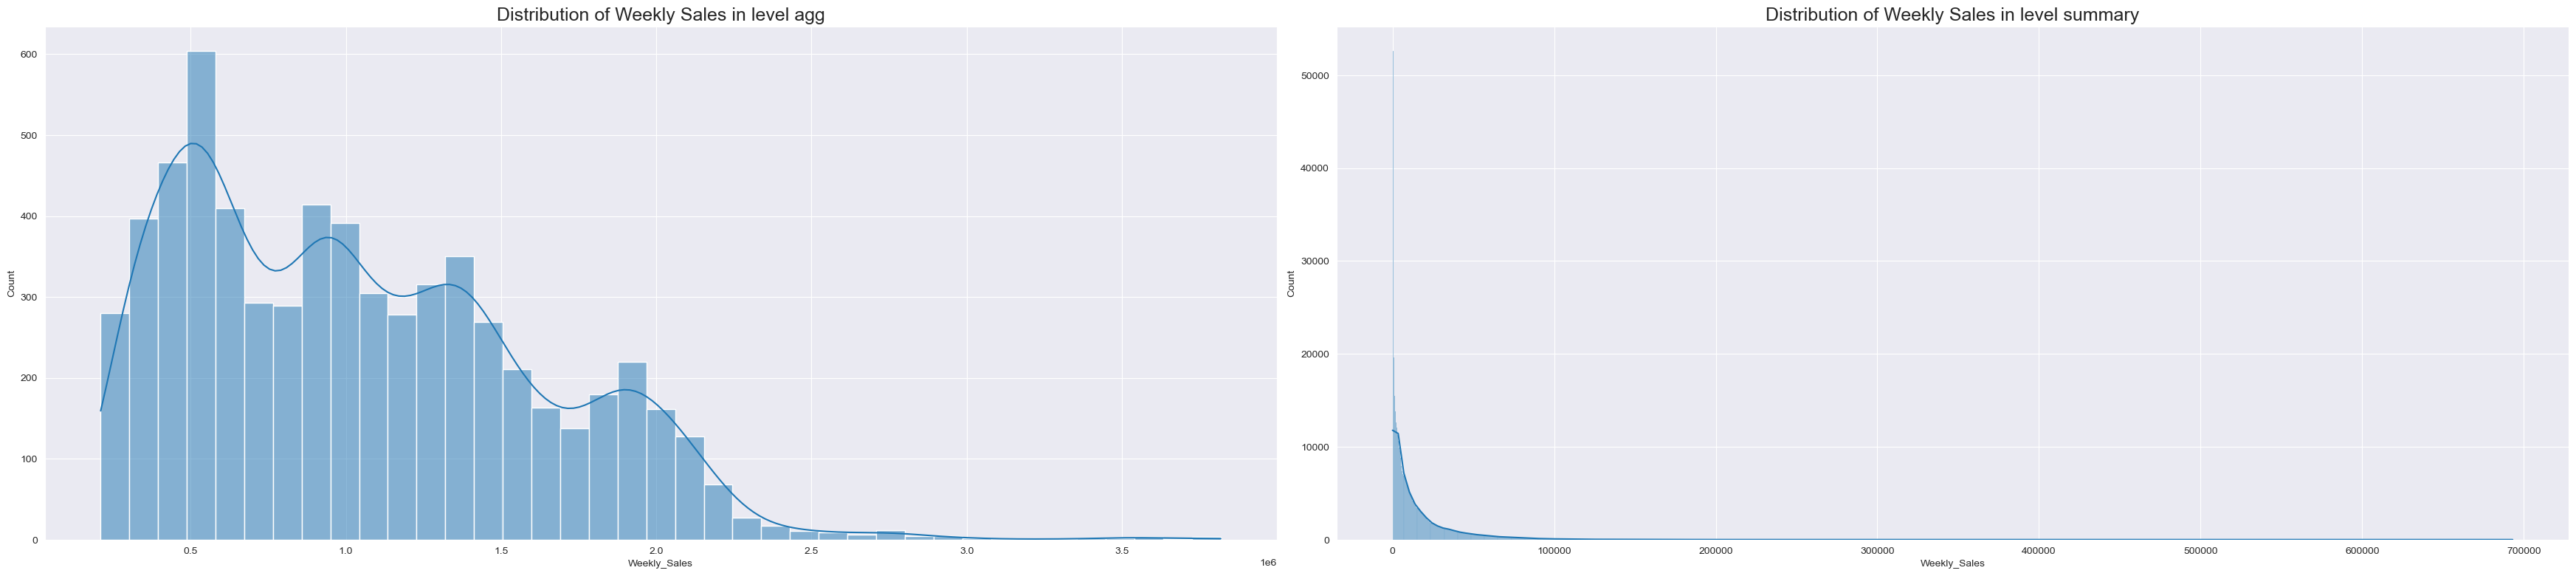

In [37]:
plt.figure(figsize=(35,15), facecolor='white')
plotnumber = 1
sns.set_style('darkgrid')
for i,u in zip([agg,summary],['agg','summary']):
    ax = plt.subplot(2,2,plotnumber)
    sns.histplot(data= i, x= 'Weekly_Sales', kde = True, palette="tab10")
    plt.title(f"Distribution of Weekly Sales in level {u}",fontsize = 18)
    plotnumber +=1
    
plt.tight_layout()    
plt.show()

We wil graph the median values of target variables "Weekly_Sales" on different categories due to the skewed distribution of sales

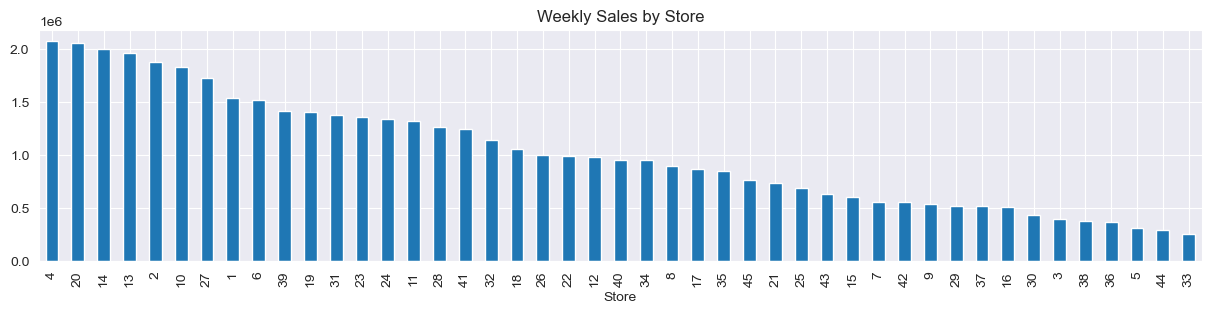

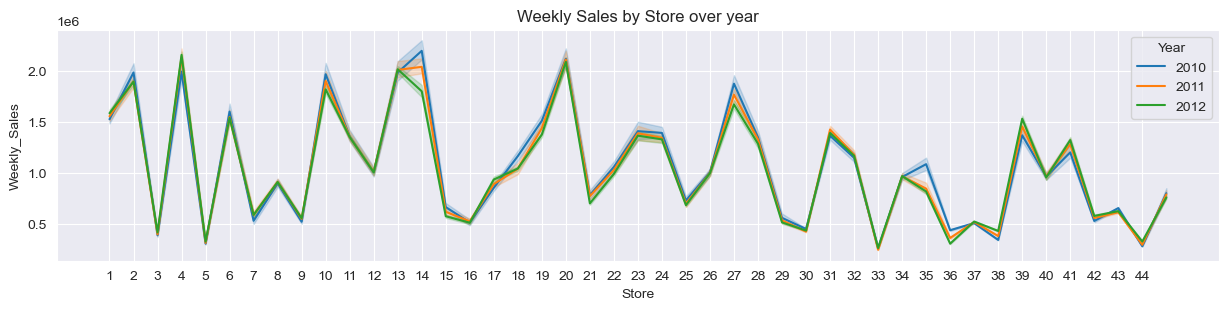

In [38]:
agg.groupby('Store').Weekly_Sales.median().sort_values(ascending=False).plot.bar(figsize=(15, 3),title='Weekly Sales by Store')
plt.figure(figsize=(15,3))
sns.lineplot(data= agg, x='Store', y='Weekly_Sales', hue='Year', palette= 'tab10')
plt.title('Weekly Sales by Store over year')
plt.xticks(range(1, 45))
plt.show()

There are differences between stores in term of weekly sales. This also remains over years.  
Top 10 having highest average sales are 4,20,14,13,2,10,27,1,6 and 39

In [39]:
print('Average Weekly Sales per Store is around {0}'.format(agg.Weekly_Sales.mean()))

Average Weekly Sales per Store is around 1046978.5778818963


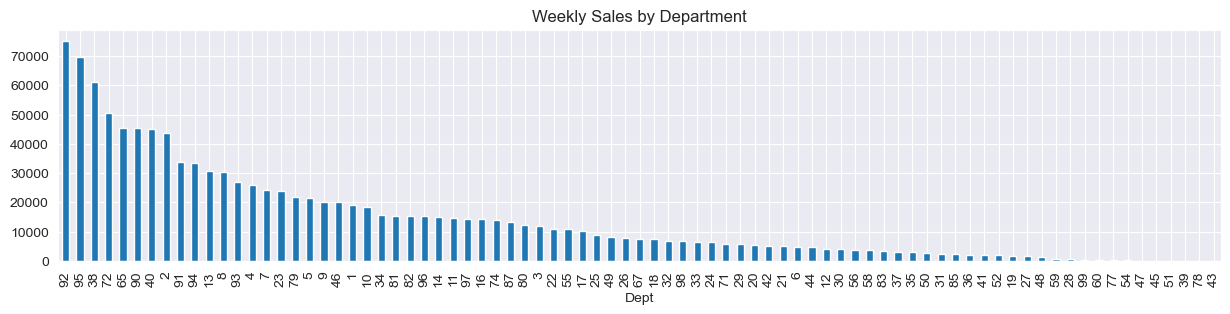

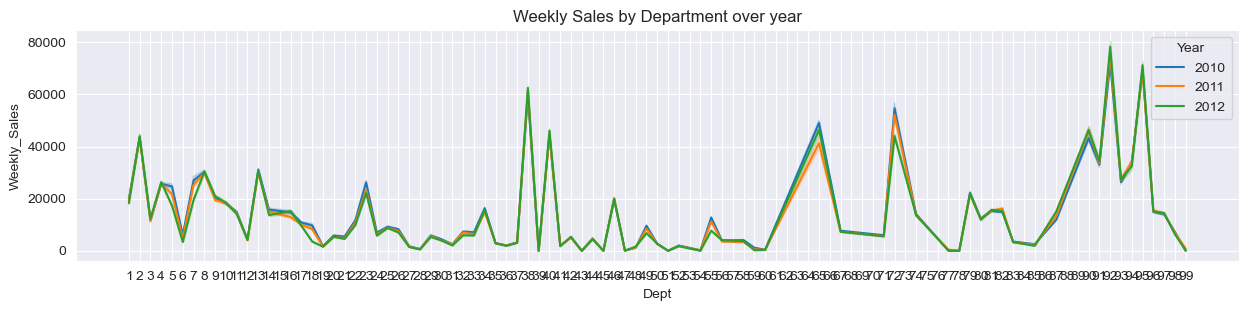

<Figure size 640x480 with 0 Axes>

In [40]:
summary.groupby('Dept').Weekly_Sales.mean().sort_values(ascending=False).plot.bar(figsize=(15, 3),title='Weekly Sales by Department')
plt.figure(figsize=(15,3))
sns.lineplot(data= summary, x='Dept', y='Weekly_Sales', hue='Year', palette= 'tab10')
plt.title('Weekly Sales by Department over year')
plt.xticks(range(1, 100))
plt.show()
plt.tight_layout()

There are differences between departments in term of weekly sales. This also remains over years.  
Top 10 having highest average sales are 92,95,38,65,72,40,2,90,94 and 91

In [41]:
print('Average Weekly Sales per department is around {0}'.format(summary.Weekly_Sales.mean()))

Average Weekly Sales per department is around 15981.46725020776


IsHoliday
True    7947.74
False   7589.95
Name: Weekly_Sales, dtype: float64


<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

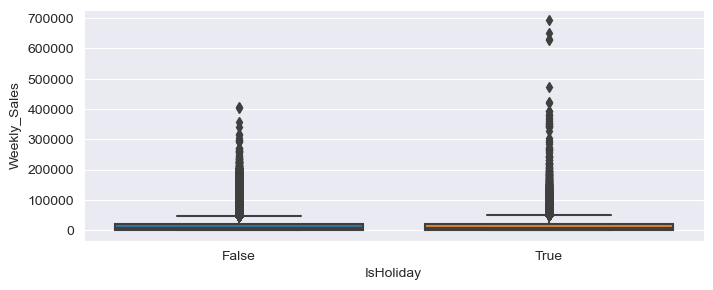

In [42]:
print(summary.groupby('IsHoliday').Weekly_Sales.median().sort_values(ascending=False))
plt.figure(figsize=(8,3))
sns.boxplot(data= summary, x='IsHoliday', y= 'Weekly_Sales', palette="tab10", dodge=False)

On the average, weekly sales in the holidays week are a bit higher than in the non-holiday weeks.  
Thus, in order that we can look at clearly about impact of holiday on sales, we need to visualize weekly_sales by time and map the specific occasional events.

In [43]:
summary.query('IsHoliday == True')['Date'].dt.strftime("%d-%m").unique()

array(['12-02', '10-09', '26-11', '31-12', '11-02', '09-09', '25-11',
       '30-12', '10-02', '07-09'], dtype=object)

In [44]:
holiday = {
    '10-02': 'Super Bowl',
    '11-02': 'Super Bowl',
    '12-02': 'Super Bowl',
    # '13-02': 'Official Super Bowl'
    # '04-09': 'Official Labor Day',
    '07-09': 'Labor Day',
    '09-09': 'Labor Day',
    '10-09': 'Labor Day',
    # '23-11': 'Thanksgiving',
    '25-11': 'Thanksgiving',
    '26-11': 'Thanksgiving',
    # '24-12': 'Official Christmas',
    '30-12': 'Christmas',
    '31-12': 'Christmas'
}

In [45]:
summary['Occasion'] = summary['Date'].dt.strftime("%d-%m").map(holiday)

In [46]:
summary['Occasion'].fillna('Normal', inplace = True)

In [47]:
summary['Occasion'].unique()

array(['Normal', 'Super Bowl', 'Labor Day', 'Thanksgiving', 'Christmas'],
      dtype=object)

Occasion
Thanksgiving   10007.38
Super Bowl      7969.23
Normal          7589.95
Labor Day       7502.66
Christmas       7046.26
Name: Weekly_Sales, dtype: float64


<AxesSubplot:xlabel='Occasion', ylabel='Weekly_Sales'>

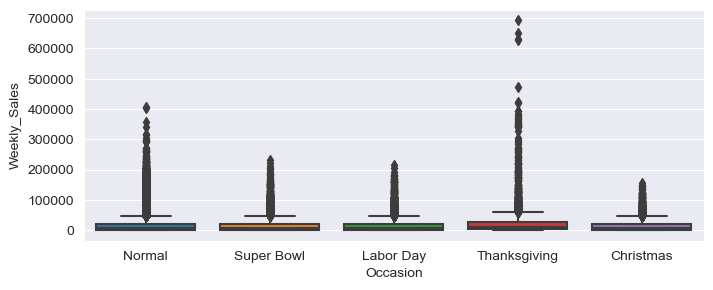

In [48]:
print(summary.groupby('Occasion').Weekly_Sales.median().sort_values(ascending=False))
plt.figure(figsize=(8,3))
sns.boxplot(data= summary, x='Occasion', y= 'Weekly_Sales', palette="tab10", dodge=False)

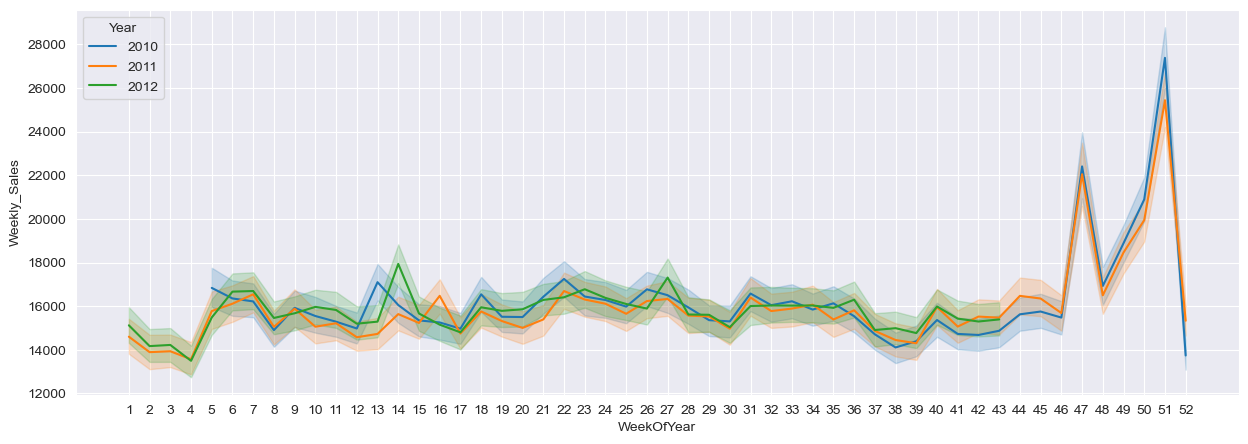

In [49]:
plt.figure(figsize=(15, 5))
sns.lineplot(data= summary, x='WeekOfYear', y='Weekly_Sales', hue='Year', palette= 'tab10')
plt.xticks(range(1, 53))
plt.show()

As seen, the highest spike weeks are 51, 47 respectively Christmas, Thanksgiving, followed by 36, 6 (Labor Day, Super Bowl).  
Together with holidays mentioned, Presidents' Day(Feb), Easter Day(Apr) shall be considerable.  
Additionally, combined with mapping holiday before, Christmas are mapped unproperly. 
Thus suggest re-map as follows:  
 - Week 51: Christmax  
 - Week 50: Before Christmas 1W  
 - Week 7: Presidents' Day  
 - Week 13(2010), Week 14(2012), Week 16(2011): Easter Day

In [50]:
occasion_adjusted = {
    '10-02': 'Super Bowl',
    '11-02': 'Super Bowl',
    '12-02': 'Super Bowl',
    # '13-02': 'Official Super Bowl'
    # '04-09': 'Official Labor Day',
    '07-09': 'Labor Day',
    '09-09': 'Labor Day',
    '10-09': 'Labor Day',
    '17-02': "Presidents' Day",
    '18-02': "Presidents' Day",
    '19-02': "Presidents' Day",
    '02-04': "Easter Day",
    '01-04': "Easter Day",
    '30-03': "Easter Day",
    '25-11': 'Thanksgiving',
    '26-11': 'Thanksgiving',
    '16-12': 'Before Christmas 1W',
    '17-12': 'Before Christmas 1W',
    '23-12': 'Christmas',
    '24-12': 'Christmas'
}

In [51]:
summary['Occasion_Adjusted'] = summary['Date'].dt.strftime("%d-%m").map(occasion_adjusted)
summary['Occasion_Adjusted'].fillna('Normal', inplace = True)

count     mean      std  min     25%      50%  \
Occasion_Adjusted                                                       
Before Christmas 1W   5972.00 20413.27 28057.07 0.00 2769.97 10271.83   
Christmas             5983.00 26396.68 37786.84 0.00 3382.99 13355.14   
Easter Day            8861.00 15704.45 21547.52 0.00 2182.21  7657.01   
Labor Day             8861.00 15881.91 22618.80 0.00 1920.79  7502.66   
Normal              368110.00 15626.55 21795.43 0.00 2046.86  7482.32   
Presidents' Day       8929.00 16484.65 22780.51 0.00 2189.75  8262.04   
Super Bowl            8895.00 16378.17 23399.03 0.00 2070.73  7969.23   
Thanksgiving          5959.00 22221.02 41243.06 0.00 2592.62 10007.38   

                         75%       max  
Occasion_Adjusted                       
Before Christmas 1W 26455.15 268789.69  
Christmas           34147.19 406988.63  
Easter Day          19939.93 203457.42  
Labor Day           19898.93 214448.96  
Normal              19840.33 293966.05  
Presidents' Day     20895.68 207773.40  
Super Bowl          20516.61 233140.32  
Thanksgiving        25892.79 693099.36

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

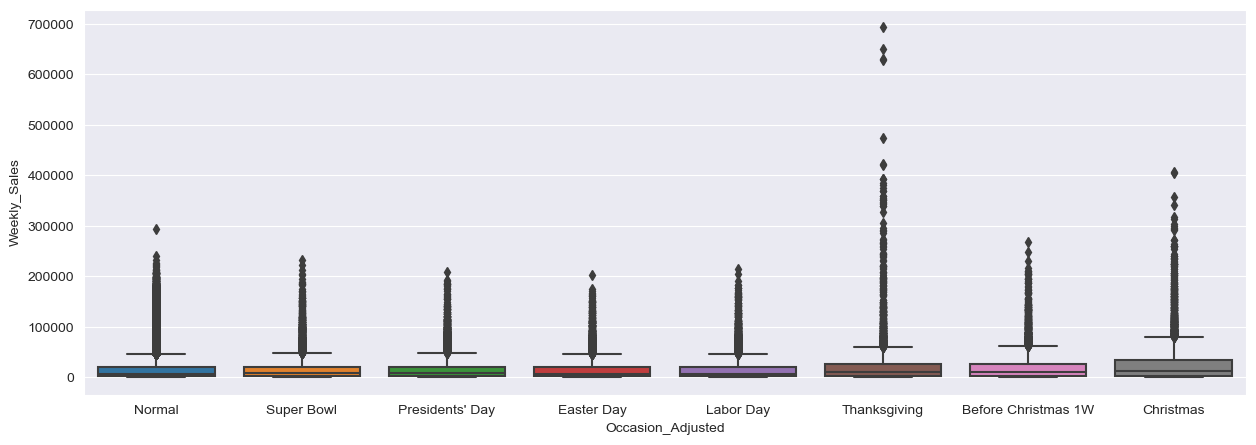

In [52]:
display(summary.groupby('Occasion_Adjusted')['Weekly_Sales'].describe())
plt.figure(figsize=(15,5))
sns.boxplot(data= summary, x='Occasion_Adjusted', y= 'Weekly_Sales', palette="tab10", dodge=False)
plt.xlabel

To sum up, there are 6 occasional events to be considerable to run campaigns which have driven up sales significantly

In [53]:
print(f'-Weekly Sales by Type in store level-')
display(agg.groupby('Type')['Weekly_Sales'].describe())
print(f'-Weekly Sales by Type in department level-')
display(summary.groupby('Type')['Weekly_Sales'].describe())
# plt.figure(figsize=(8,3))
# sns.boxplot(data= summary, x='Type', y= 'Weekly_Sales', palette="tab10", dodge=False)

-Weekly Sales by Type in store level-


count       mean       std       min        25%        50%        75%  \
Type                                                                           
A    3146.00 1376687.06 530882.79 209986.25 1049999.68 1370656.48 1759442.43   
B    2431.00  823011.78 407999.94 260636.71  537102.39  733037.32  996783.38   
C     858.00  472620.07 115620.95 241937.11  377889.14  477821.59  556387.91   

            max  
Type             
A    3818686.45  
B    3749057.69  
C     725043.04

-Weekly Sales by Type in department level-


count     mean      std  min     25%      50%      75%       max
Type                                                                     
A    215478.00 20099.77 26423.30 0.00 3315.09 10105.17 26357.18 474330.10
B    163495.00 12237.33 17203.49 0.00 1927.05  6187.87 15353.74 693099.36
C     42597.00  9519.64 15985.29 0.00  131.99  1149.67 12695.01 112152.35

On average sales in both store and department level, Type A are much higher than other 2 types.

# **EDA: Continuous**

Correlation Metrics (Vans 1996):  
- 0-0.19 “very weak”  
- 0.20-0.39 “weak”  
- 0.40-0.59 “moderate”  
- 0.60-0.79 “strong”  
- 0.80-1.0 “very strong”  

<AxesSubplot:>

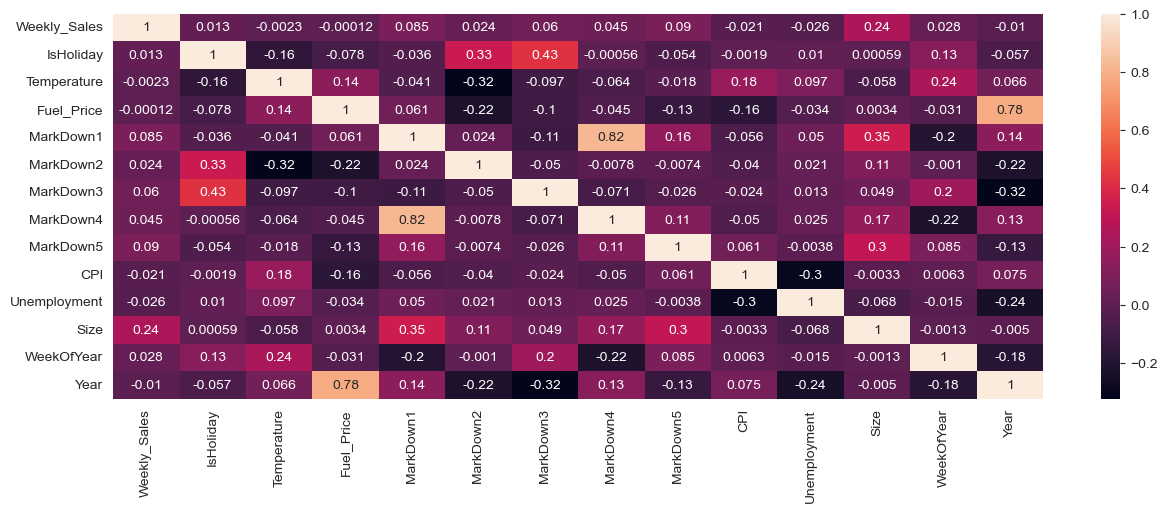

In [54]:
plt.figure(figsize=(15,5))
sns.heatmap(summary.corr(), annot = True)

In department-wide, most of attributes have very weak correlation with 'Weekly_Sales'.  
However we can check further whether the impact of each Markdown to every department is or not in the later part

<AxesSubplot:>

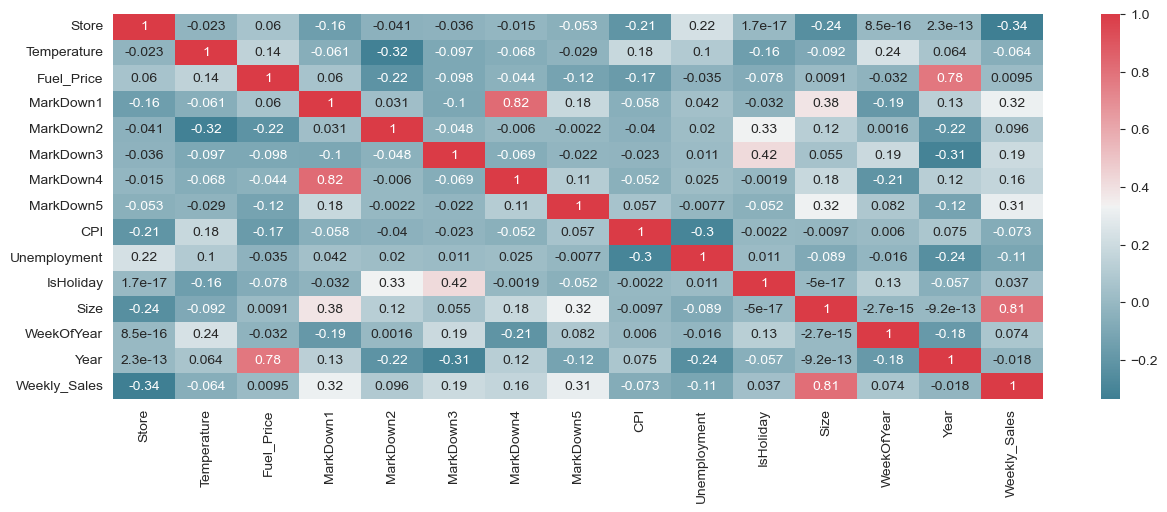

In [55]:
plt.figure(figsize=(15,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(agg.corr(), cmap=cmap, annot = True)

In store-wide, most of attributes are very weak correlated to 'Weekly_Sales' except Size, MarkDown 1 and MarkDown 5. In details:  
 - Size have a very strong with 'Weekly_Sales'
 - MarkDown are quite week but should be explored further to consider whether stores are impacted with MarkDowns

In [56]:
# summary[summary['WeekOfYear'].isin([13])]['Date'].unique()

In [57]:
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr

In [58]:
for i in range(45):
    for markdown in MarkDown:
        df = agg[(agg[markdown].notna())&(agg['Store']==i+1)]
        if len(df) >= 2:
            corr, _ = pearsonr(df['Weekly_Sales'], df[markdown])
            if abs(corr) >= 0.6:
                print(f'Pearsons correlation between Store {i+1} and {markdown} ({len(df)}): %.2f' % corr)

Pearsons correlation between Store 5 and MarkDown3 (43): 0.67
Pearsons correlation between Store 35 and MarkDown3 (48): 0.72


Although Pearsons correlation seem to be quite high but the number of variables is quite low, so we conclude that no store has been impacted by MarkDown

In [59]:
dept = summary['Dept'].unique()
dept_list = list(dept)
for i in dept_list:
    for markdown in MarkDown:
        df = summary[(summary[markdown].notna())&(summary['Dept'] == i+1)]
        if len(df) >= 2:
            corr, _ = pearsonr(df['Weekly_Sales'], df[markdown])
            if abs(corr) >= 0.6:
                print(f'Pearsons correlation between dept {i+1} and {markdown} ({len(df)} pairs): %.2f' % corr)

Pearsons correlation between dept 6 and MarkDown3 (1929 pairs): 0.62
Pearsons correlation between dept 39 and MarkDown3 (8 pairs): -0.61
Pearsons correlation between dept 72 and MarkDown3 (1978 pairs): 0.69


As seen, only department 72 and 6 has a strong correlation with 'Weekly_Sales'.

<AxesSubplot:xlabel='MarkDown3', ylabel='Weekly_Sales'>

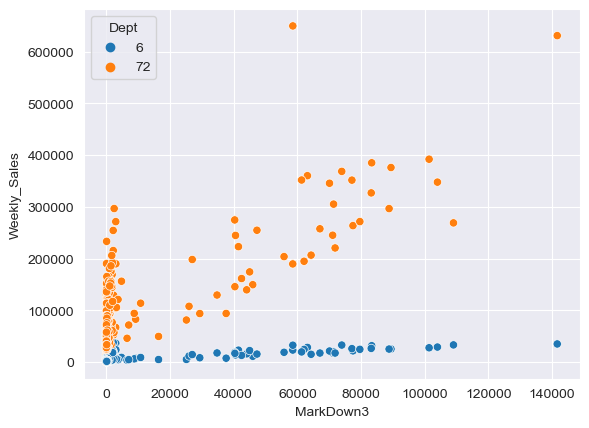

In [60]:
sns.scatterplot(data= summary[(summary['Dept'].isin([6,72]))], y= 'Weekly_Sales', x = 'MarkDown3', palette="tab10", hue = 'Dept')

**Top Stores Analysis**

History data ranges from 02/2010 to 26/10/2012 and distribution of weekly sales is quite skewed, thus use median() for comparison sales between stores

In [61]:
store = agg.groupby('Store').Weekly_Sales.median().sort_values(ascending=False).head(10).reset_index()
top_store = store['Store'].tolist()

In [62]:
top_store

[4, 20, 14, 13, 2, 10, 27, 1, 6, 39]

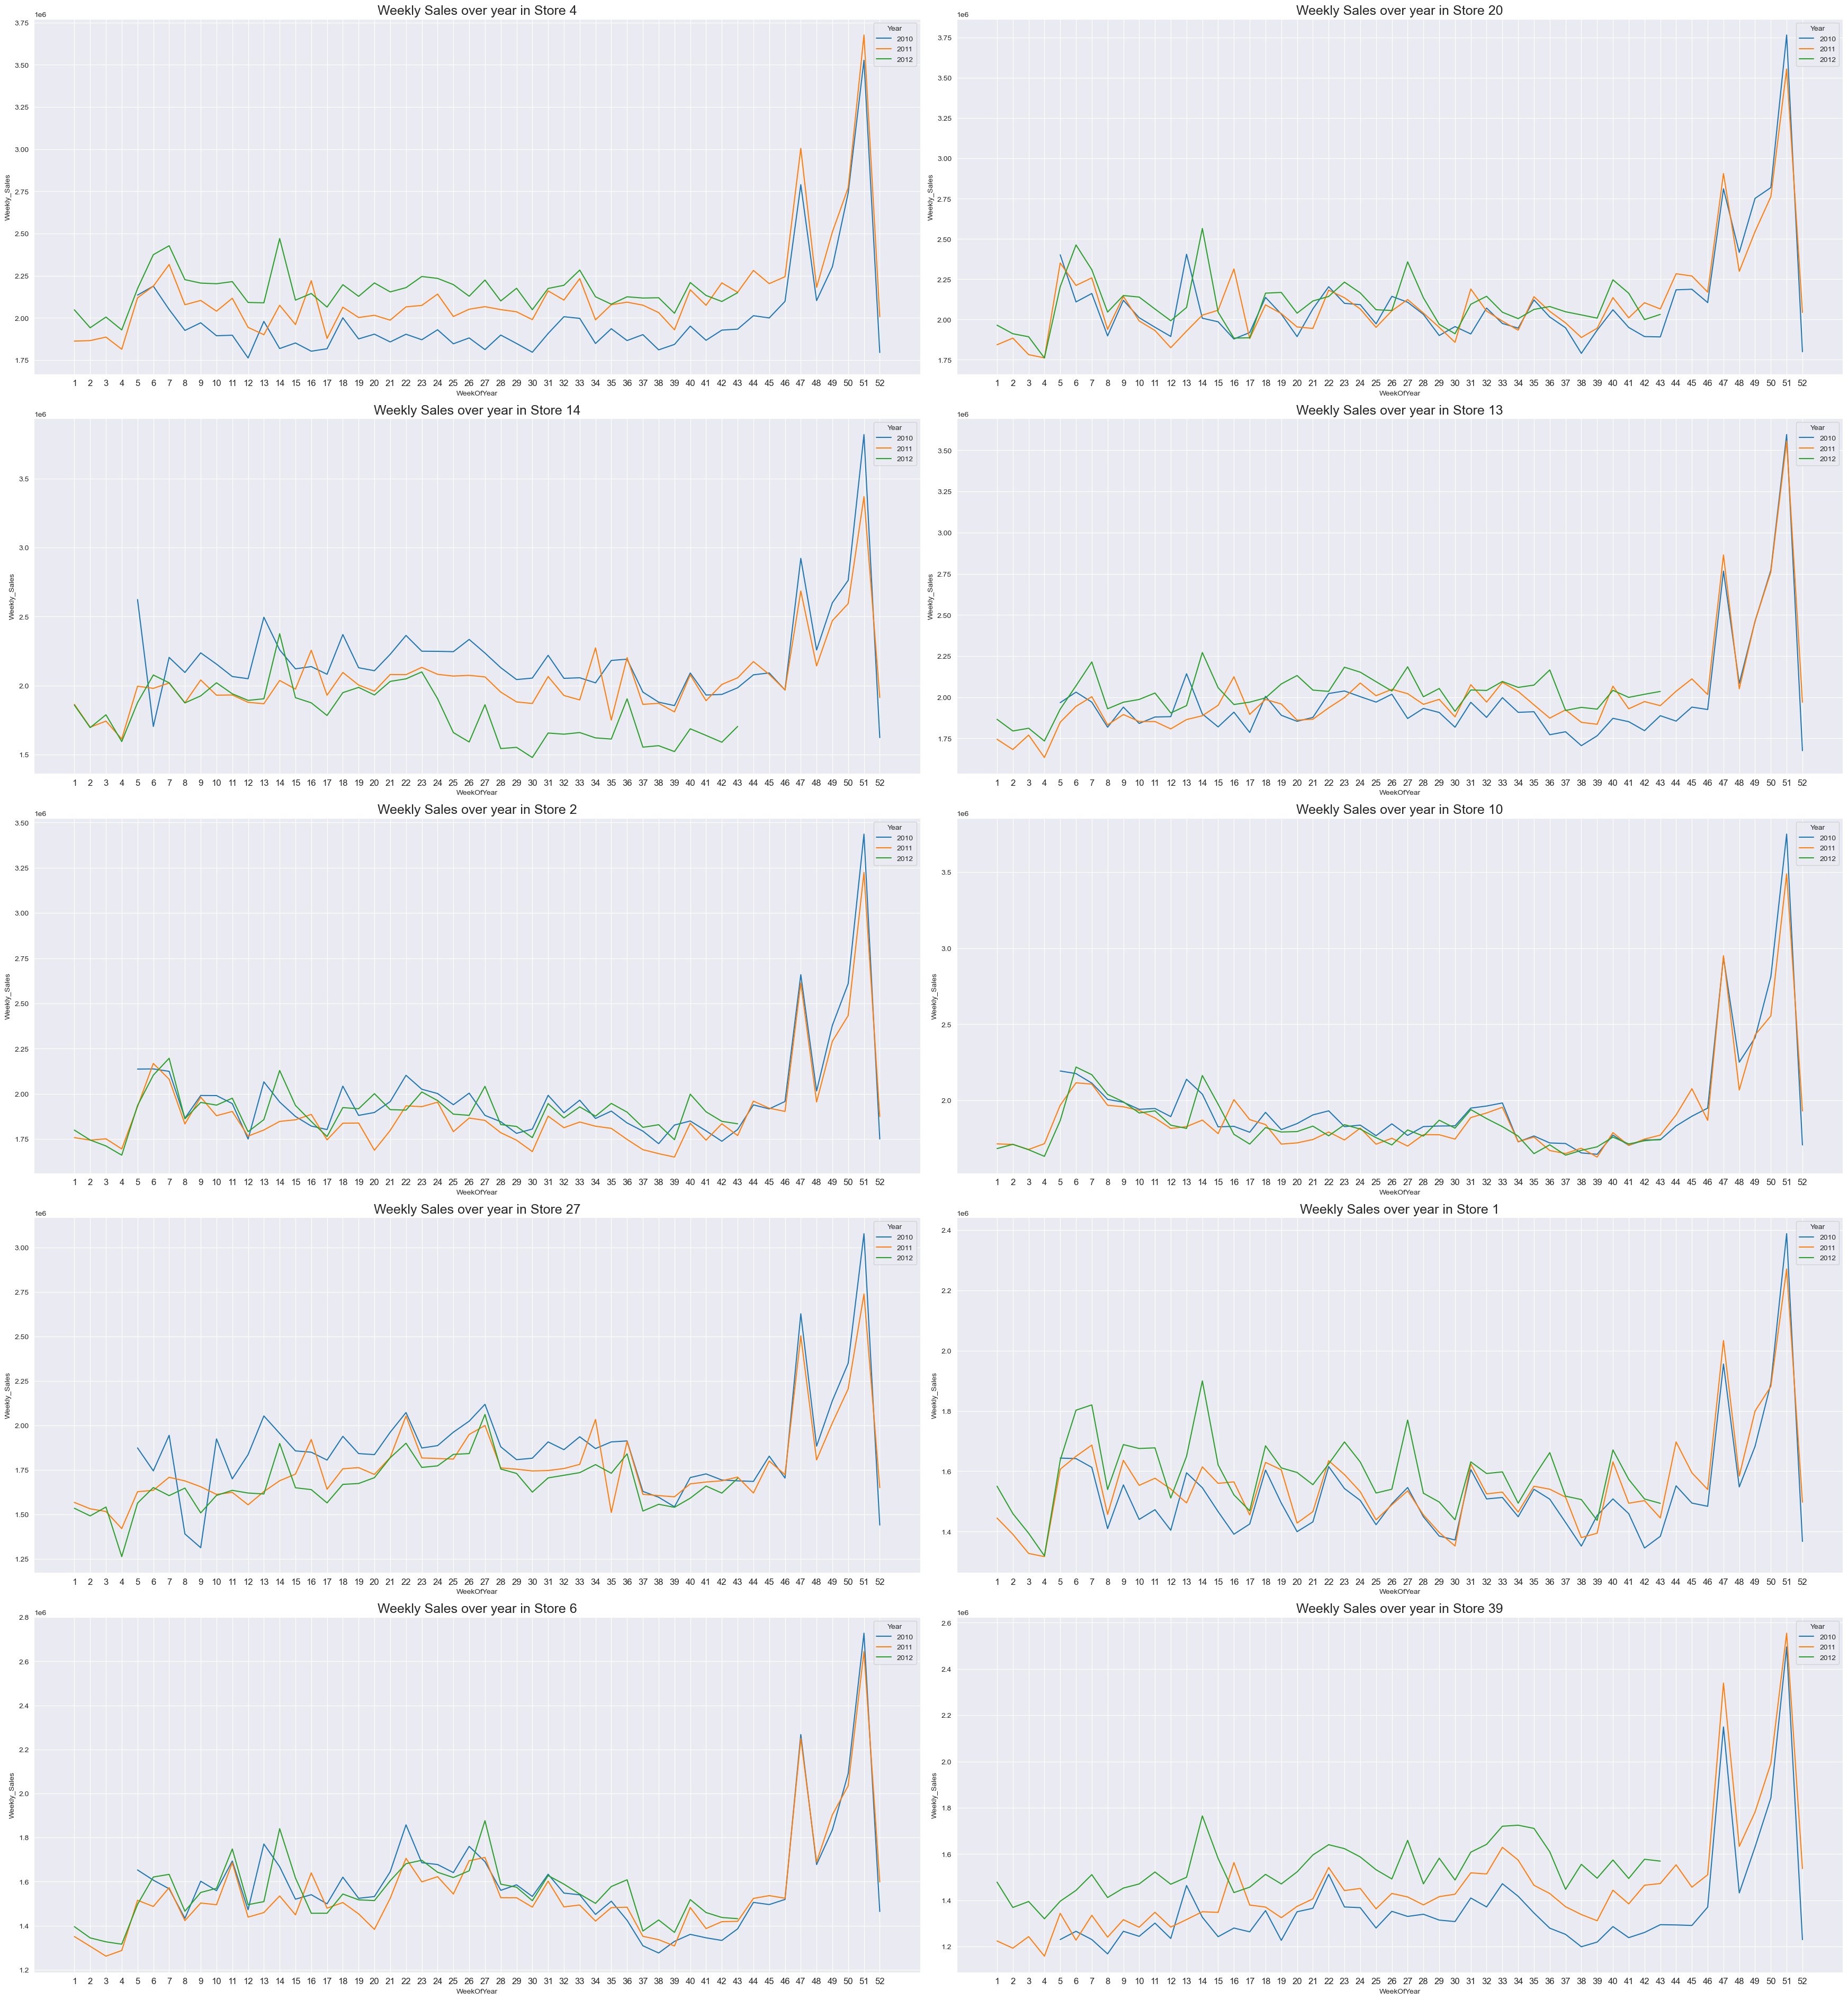

In [63]:
plt.figure(figsize=(35,45), facecolor='white')
plotnumber = 1
sns.set_style('darkgrid')
for i in top_store:
    ax = plt.subplot(6,2,plotnumber)
    sns.lineplot(data= agg[agg['Store'] == i].groupby(['WeekOfYear','Year'])['Weekly_Sales'].median().reset_index(), 
                 x='WeekOfYear', y='Weekly_Sales', hue='Year', palette= 'tab10')
    plt.xticks(range(1, 53),fontsize = 12)
    plt.title(f"Weekly Sales over year in Store {i}",fontsize = 18)
    plotnumber +=1
    
plt.tight_layout()    
plt.show()

In [64]:
pivot_store = pd.pivot_table(agg[(agg['WeekOfYear'] >= 5) & (agg['WeekOfYear'] <= 43) & (agg['Store'].isin(top_store))], 
               index=['Store'], 
               columns=['Year'], 
               values='Weekly_Sales', 
               fill_value=0, 
               aggfunc='sum').reset_index().sort_values(by=2010,ascending=False).head(10)
pivot_store['% Change'] = pivot_store[2012]/pivot_store[2010]
pivot_store

Year  Store        2010        2011        2012  % Change
6        14 83337894.25 77774708.90 70501755.67      0.85
7        20 78891209.87 79730604.34 82298267.14      1.04
1         2 74619224.76 71484925.46 74579873.38      1.00
2         4 74314505.61 80785969.11 84848227.21      1.14
5        13 74198416.35 75878158.26 79501263.38      1.07
4        10 72926078.86 70829305.99 71527118.89      0.98
8        27 71273720.32 67817066.83 66086948.83      0.93
3         6 60332189.64 58621558.00 60934002.42      1.01
0         1 57917950.76 59545309.32 62479149.42      1.08
9        39 51047237.29 54600418.74 60322991.95      1.18

With regard to Sales in Top 10 Stores, holiday days are the peak sales.  
Accordingly, Christmas and Thanksgiving are two of the most grand sales day in the year.  
Besides, store 4,13,1 and 39 have the highest increase, nearly 10% from 2010 to 2012

In [65]:
pivot_store = pd.pivot_table(agg[(agg['WeekOfYear'] >= 5) & (agg['WeekOfYear'] <= 43)], 
               index=['Store'], 
               columns=['Year'], 
               values='Weekly_Sales', 
               fill_value=0, 
               aggfunc='sum').reset_index().sort_values(by=2010, ascending=True).head(10)
pivot_store['% Change'] = pivot_store[2012]/pivot_store[2010]
pivot_store

Year  Store        2010        2011        2012  % Change
32       33 10612287.98  9741289.86 10407226.04      0.98
43       44 11034993.05 11586128.85 12924622.94      1.17
4         5 11593931.55 11956765.28 12981842.09      1.12
37       38 13441983.99 14852528.99 16911249.15      1.26
2         3 14566711.89 15106066.62 16543545.91      1.14
35       36 17544523.26 14538702.56 11999678.41      0.68
29       30 17738691.68 16510696.98 17019812.62      0.96
15       16 19406616.47 19849753.63 20103304.31      1.04
8         9 19588431.04 20866068.00 22017295.06      1.12
6         7 19618666.28 21968273.24 22941985.10      1.17

Out of the bottom 10 stores, Store 36 experienced a significant decrease of 30% from 2010 to 2012. Therefore, it is advisable for the store to conduct a thorough performance review and evaluate the possibility of closing down

After analyzing the top stores with good sales, the next step is to break down the data to the department level.

In [66]:
list = []
for i in range (10):
    x = 'List' + str(i+1) 
    list.append(x)
my_dict = {}
for i,u in zip(top_store,list):
    pivot_store = pd.pivot_table(summary[(summary['WeekOfYear'] >= 5) & (summary['WeekOfYear'] <= 43) & (summary['Store'] == i)], 
                   index=['Dept'], 
                   columns=['Year'], 
                   values='Weekly_Sales', 
                   fill_value=0, 
                   aggfunc='sum').reset_index().sort_values(by=2010, ascending=False).head(20)
    
    x = pivot_store['Dept'].to_list()
    my_dict[u] = x

In [67]:
common = set(my_dict['List1']).intersection(my_dict['List2'], my_dict['List3'], my_dict['List4'], 
                                   my_dict['List5'], my_dict['List6'], my_dict['List7'],
                                   my_dict['List8'], my_dict['List9'], my_dict['List10'])
print(f'We have identified that the top common departments are {common}')

We have identified that the top common departments are {2, 4, 38, 40, 72, 8, 13, 92, 95}


**Top Departments Analysis**

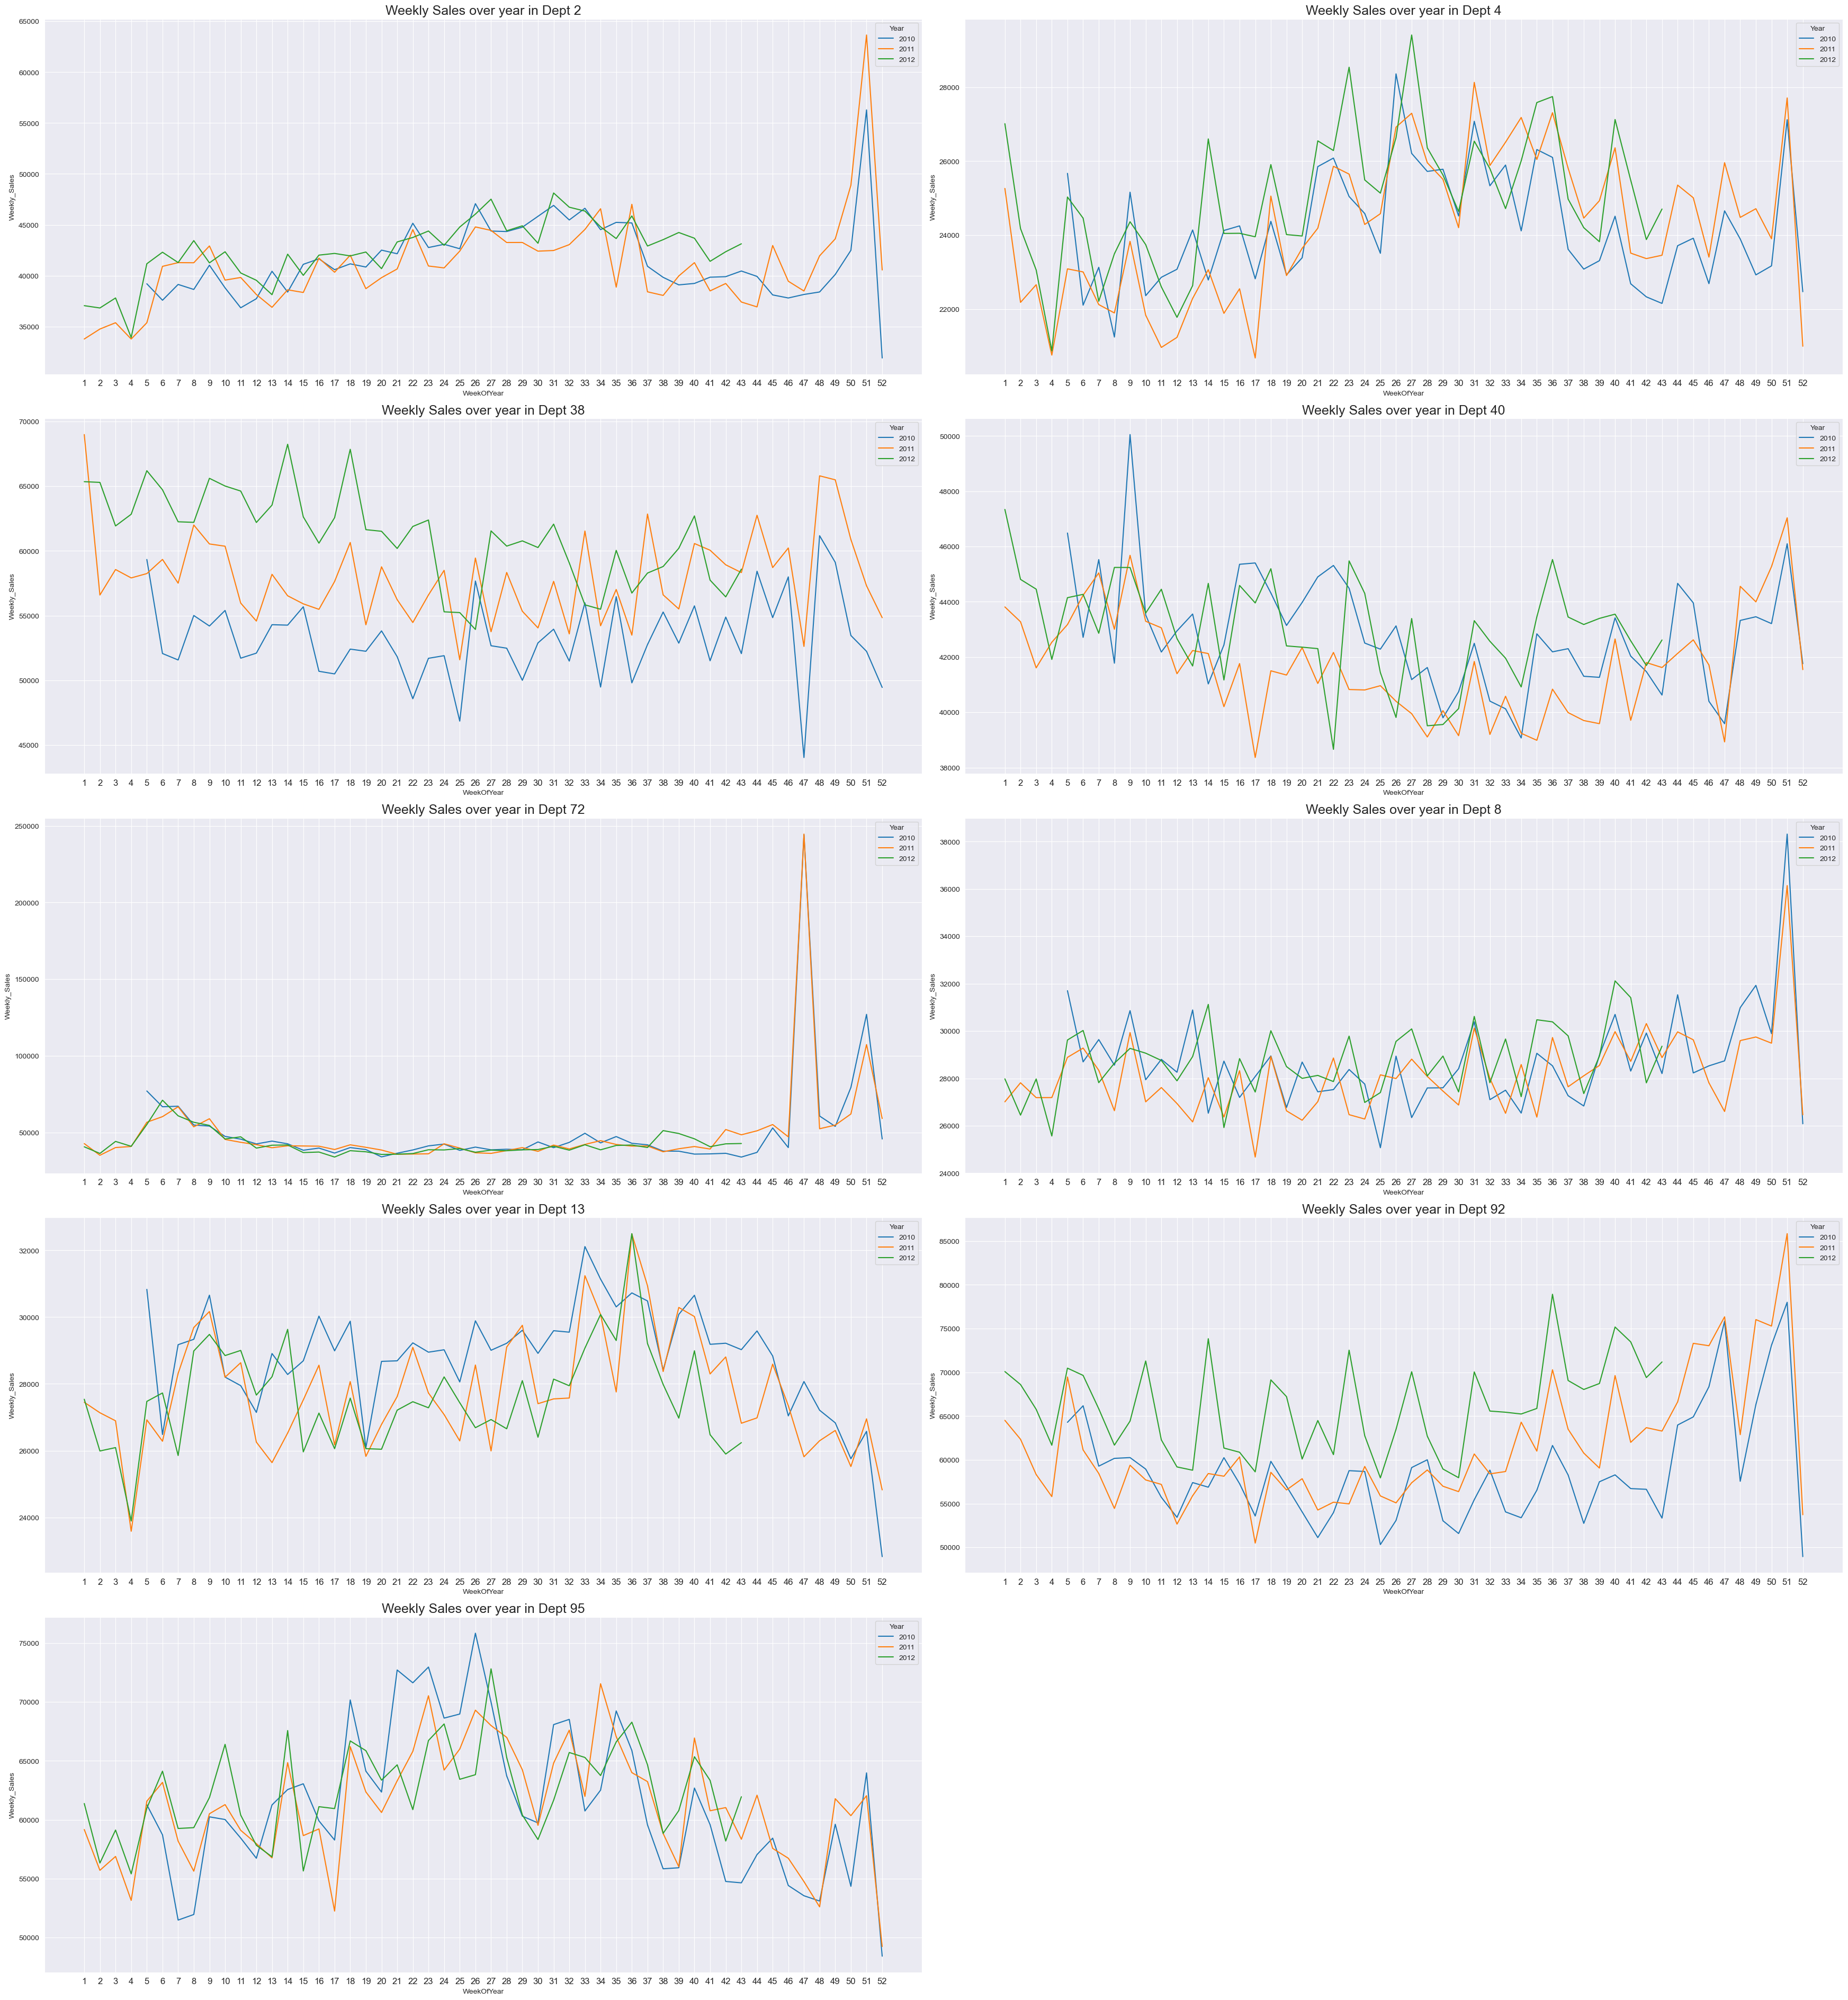

In [68]:
plt.figure(figsize=(35,45), facecolor='white')
plotnumber = 1
sns.set_style('darkgrid')
for i in common:
    ax = plt.subplot(6,2,plotnumber)
    sns.lineplot(data= summary[summary['Dept'] == i].groupby(['WeekOfYear','Year'])['Weekly_Sales'].median().reset_index(), 
                 x='WeekOfYear', y='Weekly_Sales', hue='Year', palette= 'tab10')
    plt.xticks(range(1, 53),fontsize = 12)
    plt.title(f"Weekly Sales over year in Dept {i}",fontsize = 18)
    plotnumber +=1
    
plt.tight_layout()    
plt.show()

In [69]:
pivot_store = pd.pivot_table(summary[(summary['WeekOfYear'] >= 5) & (summary['WeekOfYear'] <= 43) & (summary['Dept'].isin(common))], 
               index=['Dept'], 
               columns=['Year'], 
               values='Weekly_Sales', 
               fill_value=0, 
               aggfunc='median').reset_index().sort_values(by=2010,ascending=False).head(10)
pivot_store['% Change'] = pivot_store[2012]/pivot_store[2010]
pivot_store

Year  Dept     2010     2011     2012  % Change
8       95 62120.61 61790.74 62258.46      1.00
7       92 56840.91 59060.91 66528.16      1.17
4       38 52896.28 57335.39 60590.47      1.15
6       72 43180.88 42802.09 42100.43      0.97
5       40 42866.88 41576.50 43447.49      1.01
0        2 41262.86 40764.70 42819.30      1.04
3       13 29186.15 27874.10 27844.10      0.95
2        8 28375.66 28000.21 28807.90      1.02
1        4 24092.80 24230.62 24670.89      1.02

At department level, holidays have different weight on "Weekly Sales".  
For most of department number, Christmas and Thanksgiving have the largest impact on Sales as Dept 2,72,8,92. 
Department 13 have increasing sales from week 12 to week 36 and have decrease trend in the end of year.
Department 4, 95 have the biggest sales in middle of year